In [60]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.patches as mpatches

# Let's plot the normalized PV information

# Load the MATLAB file
file_path = '../Data/03_Unit_Spatial_Information.mat'
data = scipy.io.loadmat(file_path)

data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'spaSubsetTotal', 'spaSubsetStart', 'spaSubsetGoal', 'spaNotSubsetTotal', 'spaNotSubsetStart', 'spaNotSubsetGoal', 'cueSubsetTotal', 'cueSubsetStart', 'cueSubsetGoal', 'cueNotSubsetTotal', 'cueNotSubsetStart', 'cueNotSubsetGoal'])

In [61]:
for key, value in data.items():
    if "__" not in key:
        print("%s stats: %f ± %f" % (key, np.mean(value.flatten()), scipy.stats.sem(value.flatten(), ddof=0)))

spaSubsetTotal stats: 3.577379 ± 0.284466
spaSubsetStart stats: 1.499750 ± 0.156002
spaSubsetGoal stats: 2.947150 ± 0.277717
spaNotSubsetTotal stats: 3.623230 ± 0.172597
spaNotSubsetStart stats: 1.948756 ± 0.119772
spaNotSubsetGoal stats: 2.782267 ± 0.165990
cueSubsetTotal stats: 3.083265 ± 0.217387
cueSubsetStart stats: 1.428938 ± 0.192069
cueSubsetGoal stats: 2.346579 ± 0.203687
cueNotSubsetTotal stats: 3.416750 ± 0.116373
cueNotSubsetStart stats: 1.835411 ± 0.097498
cueNotSubsetGoal stats: 2.427177 ± 0.103217


In [62]:
# Let's plot the normalized PV information

# Load the MATLAB file
file_path = '../Data/04_Normed_PV_Information.mat'
data = scipy.io.loadmat(file_path)

data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'spaSubsetStartDecStart', 'spaNotSubsetStartDecStart', 'spaSubsetStartDecGoal', 'spaNotSubsetStartDecGoal', 'spaSubsetGoalDecStart', 'spaNotSubsetGoalDecStart', 'spaSubsetGoalDecGoal', 'spaNotSubsetGoalDecGoal', 'cueSubsetStartDecStart', 'cueNotSubsetStartDecStart', 'cueSubsetStartDecGoal', 'cueNotSubsetStartDecGoal', 'cueSubsetGoalDecStart', 'cueNotSubsetGoalDecStart', 'cueSubsetGoalDecGoal', 'cueNotSubsetGoalDecGoal'])

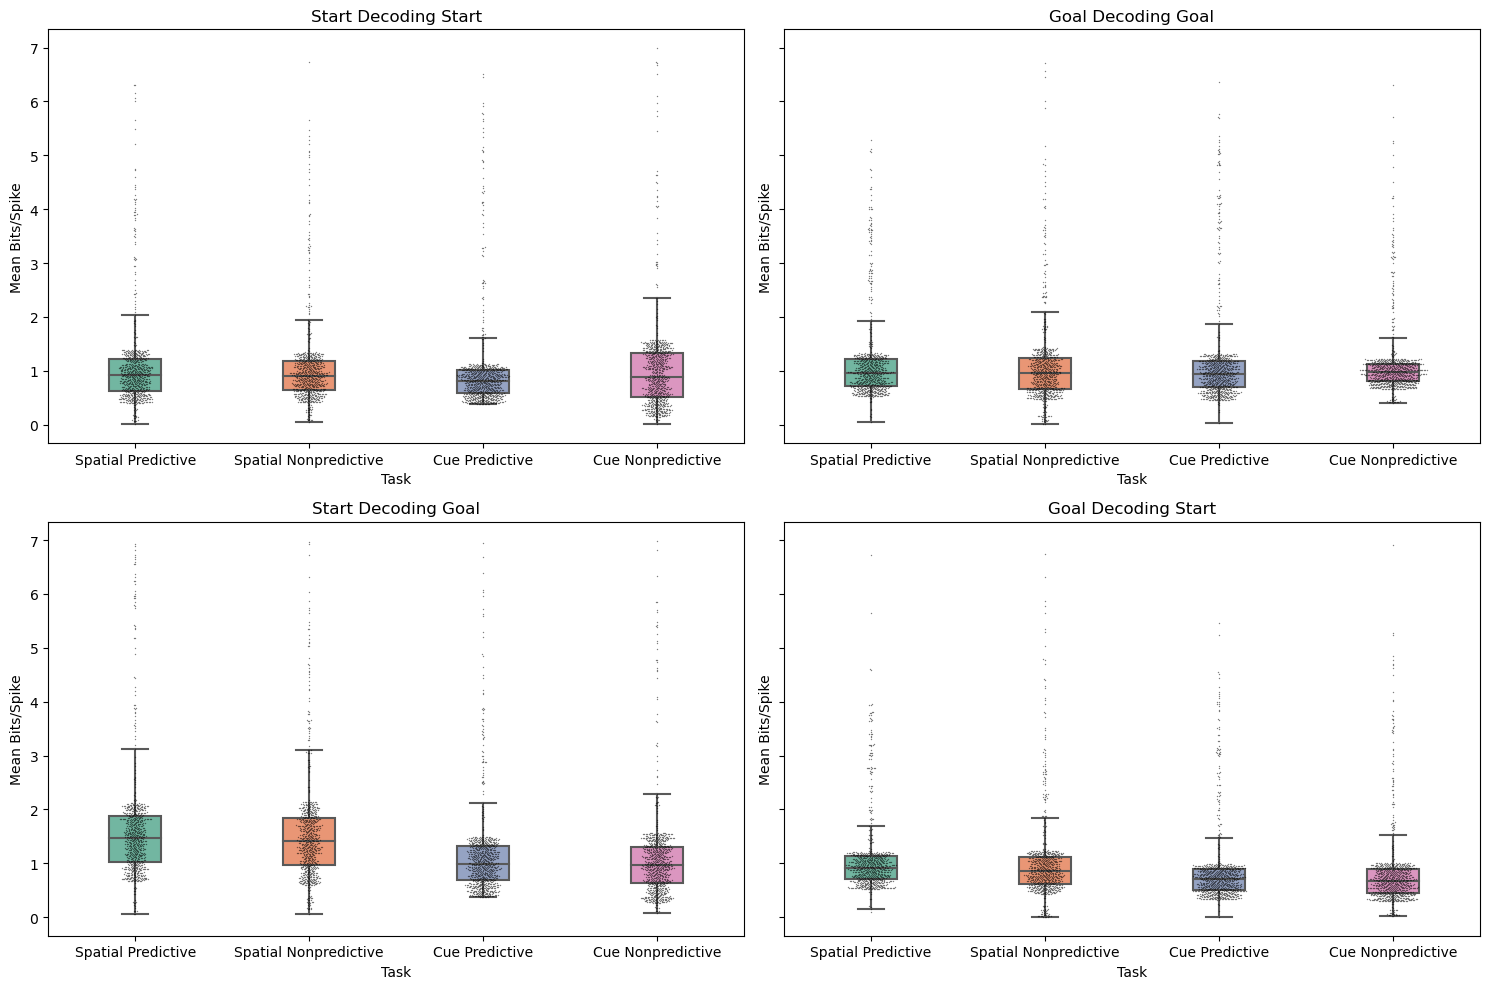

In [63]:
# New labels for display
new_task_labels = {'spa': 'Spatial', 'cue': 'Cue'}
new_subset_labels = {'Subset': 'Predictive', 'NotSubset': 'Nonpredictive'}
new_grouping_labels = {'StartDecStart': 'Start Decoding Start', 'GoalDecGoal': 'Goal Decoding Goal',
                       'StartDecGoal': 'Start Decoding Goal', 'GoalDecStart': 'Goal Decoding Start'}

# Original labels for data extraction
tasks = ['spa', 'cue']
subsets = ['Subset', 'NotSubset']
groupings = ['StartDecStart', 'GoalDecGoal', 'StartDecGoal', 'GoalDecStart']

# Create a DataFrame to organize the data for plotting
df = pd.DataFrame()

# Extract data for each condition and add to the DataFrame
for task in tasks:
    for subset in subsets:
        for grouping in groupings:
            # Construct the variable name for data extraction
            var_name = f'{task}{subset}{grouping}'
            # Extract data
            data_array = data[var_name].flatten()
            # Create temporary DataFrame to organize this portion of the data
            temp_df = pd.DataFrame({
                'Task': f'{new_task_labels[task]} {new_subset_labels[subset]}',
                'Grouping': new_grouping_labels[grouping],
                'MeanBitsPerSpike': data_array
            })
            # Append to the main DataFrame
            df = pd.concat([df, temp_df], ignore_index=True)

# Set the corrected order for x-axis categories based on the task and subset
corrected_order = ['Spatial Predictive', 'Spatial Nonpredictive', 'Cue Predictive', 'Cue Nonpredictive']

# Initialize a grid for the 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Create a swarmplot and a boxplot for each grouping
for i, grouping in enumerate(new_grouping_labels.values()):
    ax = axes_flat[i]
    # Overlaying the boxplot
    sns.boxplot(x='Task', y='MeanBitsPerSpike', data=df[df['Grouping'] == grouping], 
                order=corrected_order, ax=ax, width=0.3, palette="Set2", fliersize=0)
    # Overlaying the swarmplot
    sns.swarmplot(x='Task', y='MeanBitsPerSpike', data=df[df['Grouping'] == grouping], 
                  order=corrected_order, ax=ax, size=1, color="k", alpha=0.5)
    ax.set_title(grouping)
    ax.set_xlabel('Task')
    ax.set_ylabel('Mean Bits/Spike')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('Fig_3_box_plot.tiff', format='tiff')

# Show the plot
plt.show()

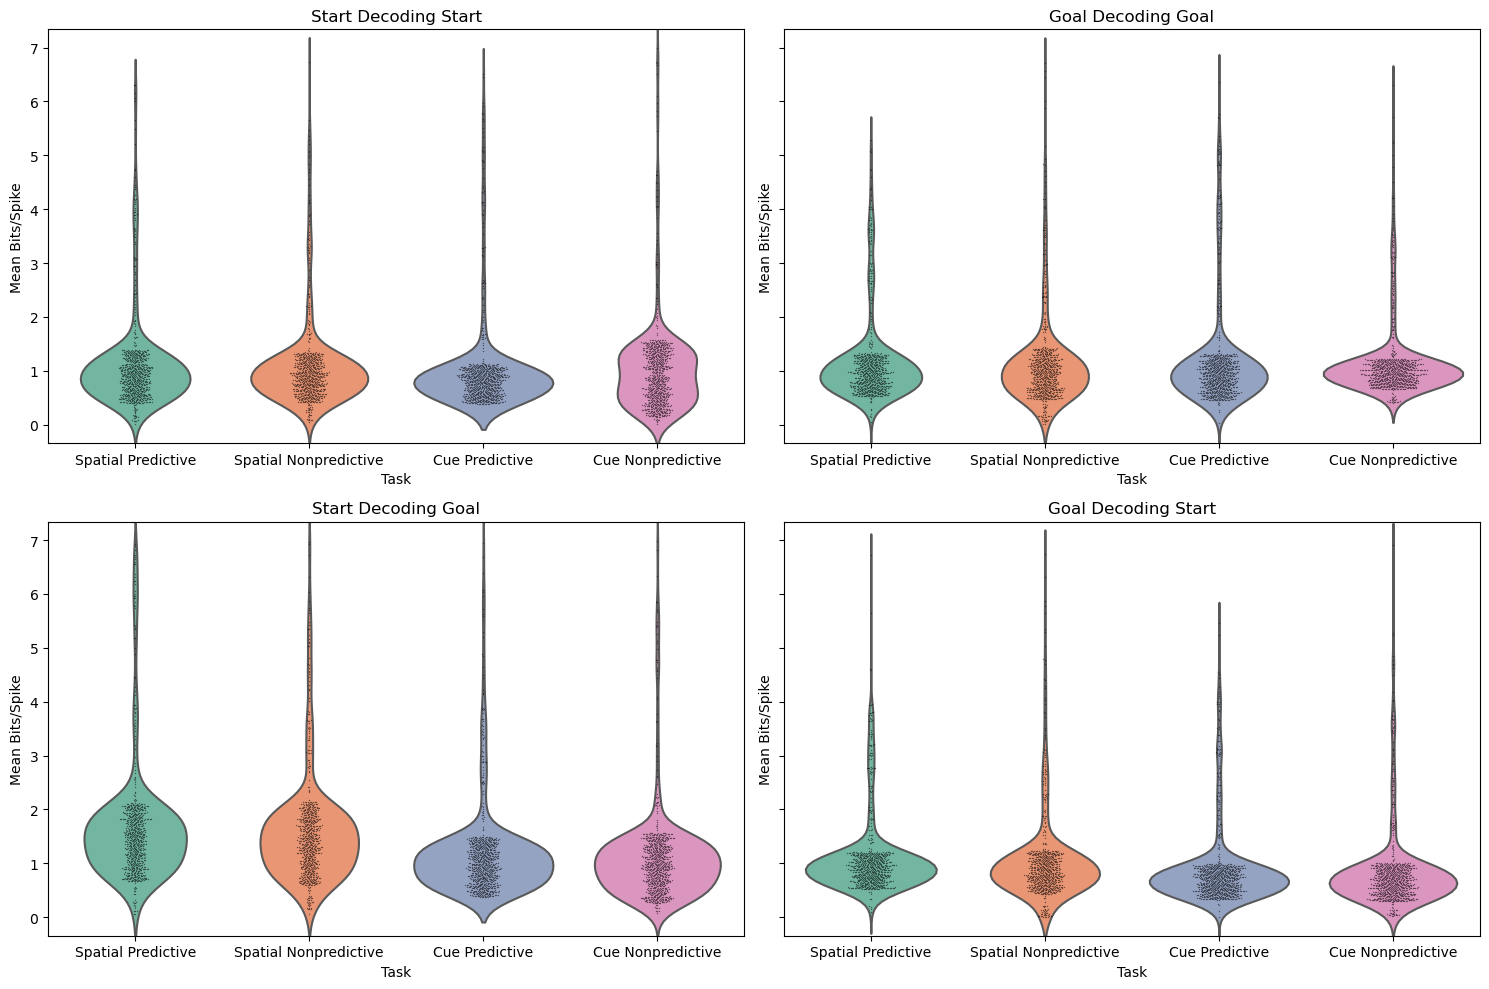

In [64]:
# New labels for display
new_task_labels = {'spa': 'Spatial', 'cue': 'Cue'}
new_subset_labels = {'Subset': 'Predictive', 'NotSubset': 'Nonpredictive'}
new_grouping_labels = {'StartDecStart': 'Start Decoding Start', 'GoalDecGoal': 'Goal Decoding Goal',
                       'StartDecGoal': 'Start Decoding Goal', 'GoalDecStart': 'Goal Decoding Start'}

# Create a DataFrame to organize the data for plotting
df = pd.DataFrame()

# Extract data for each condition and add to the DataFrame
for task in ['spa', 'cue']:
    for subset in ['Subset', 'NotSubset']:
        for grouping in ['StartDecStart', 'GoalDecGoal', 'StartDecGoal', 'GoalDecStart']:
            var_name = f'{task}{subset}{grouping}'
            data_array = data[var_name].flatten()
            temp_df = pd.DataFrame({
                'Task': f'{new_task_labels[task]} {new_subset_labels[subset]}',
                'Grouping': new_grouping_labels[grouping],
                'MeanBitsPerSpike': data_array
            })
            df = pd.concat([df, temp_df], ignore_index=True)

# Set the corrected order for x-axis categories
corrected_order = ['Spatial Predictive', 'Spatial Nonpredictive', 'Cue Predictive', 'Cue Nonpredictive']

# Initialize a grid for the 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Create a violin plot and overlay the swarmplot for each grouping
for i, grouping in enumerate(new_grouping_labels.values()):
    ax = axes_flat[i]
    sns.violinplot(x='Task', y='MeanBitsPerSpike', data=df[df['Grouping'] == grouping], 
                   order=corrected_order, ax=ax, palette="Set2", inner=None)
    sns.swarmplot(x='Task', y='MeanBitsPerSpike', data=df[df['Grouping'] == grouping], 
                  order=corrected_order, ax=ax, size=1, color="k", alpha=0.5)
    ax.set_title(grouping)
    ax.set_xlabel('Task')
    ax.set_ylabel('Mean Bits/Spike')

plt.tight_layout()
plt.savefig('Fig_3_violin_plot.tiff', format='tiff')
plt.show()

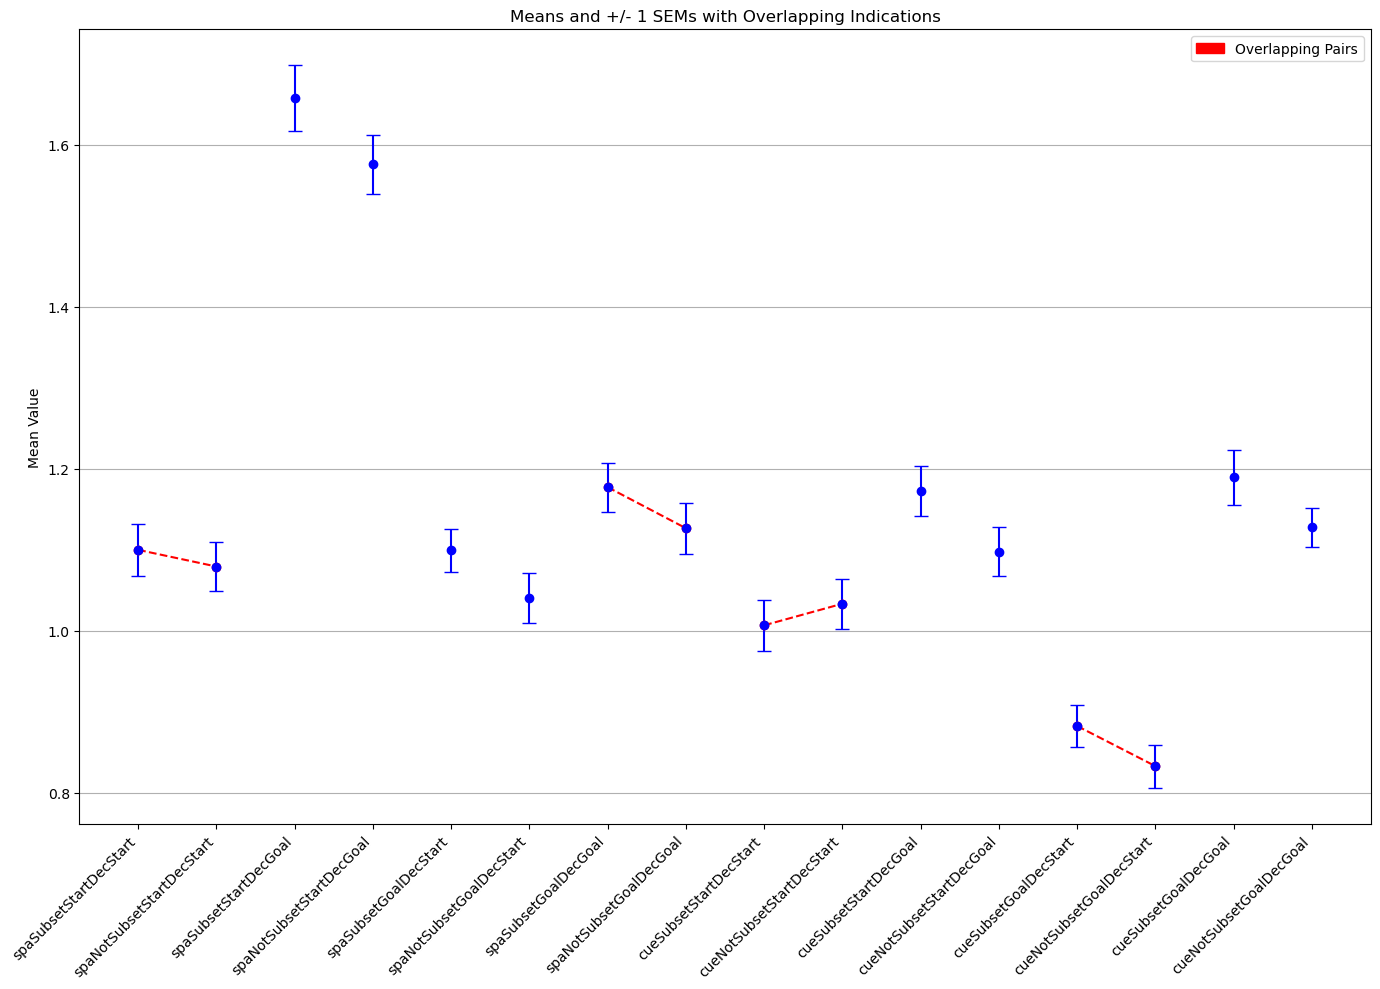

In [65]:
# Data for means and SEMs
means_sems = {
    'spaSubsetStartDecStart': {'Mean': np.mean(data['spaSubsetStartDecStart'].flatten()), 'SEM': scipy.stats.sem(data['spaSubsetStartDecStart'].flatten(), ddof=0)},
    'spaNotSubsetStartDecStart': {'Mean': np.mean(data['spaNotSubsetStartDecStart'].flatten()), 'SEM': scipy.stats.sem(data['spaNotSubsetStartDecStart'].flatten(), ddof=0)},
    'spaSubsetStartDecGoal': {'Mean': np.mean(data['spaSubsetStartDecGoal'].flatten()), 'SEM': scipy.stats.sem(data['spaSubsetStartDecGoal'].flatten(), ddof=0)},
    'spaNotSubsetStartDecGoal': {'Mean': np.mean(data['spaNotSubsetStartDecGoal'].flatten()), 'SEM': scipy.stats.sem(data['spaNotSubsetStartDecGoal'].flatten(), ddof=0)},
    'spaSubsetGoalDecStart': {'Mean': np.mean(data['spaSubsetGoalDecStart'].flatten()), 'SEM': scipy.stats.sem(data['spaSubsetGoalDecStart'].flatten(), ddof=0)},
    'spaNotSubsetGoalDecStart': {'Mean': np.mean(data['spaNotSubsetGoalDecStart'].flatten()), 'SEM': scipy.stats.sem(data['spaNotSubsetGoalDecStart'].flatten(), ddof=0)},
    'spaSubsetGoalDecGoal': {'Mean': np.mean(data['spaSubsetGoalDecGoal'].flatten()), 'SEM': scipy.stats.sem(data['spaSubsetGoalDecGoal'].flatten(), ddof=0)},
    'spaNotSubsetGoalDecGoal': {'Mean': np.mean(data['spaNotSubsetGoalDecGoal'].flatten()), 'SEM': scipy.stats.sem(data['spaNotSubsetGoalDecGoal'].flatten(), ddof=0)},
    'cueSubsetStartDecStart': {'Mean': np.mean(data['cueSubsetStartDecStart'].flatten()), 'SEM': scipy.stats.sem(data['cueSubsetStartDecStart'].flatten(), ddof=0)},
    'cueNotSubsetStartDecStart': {'Mean': np.mean(data['cueNotSubsetStartDecStart'].flatten()), 'SEM': scipy.stats.sem(data['cueNotSubsetStartDecStart'].flatten(), ddof=0)},
    'cueSubsetStartDecGoal': {'Mean': np.mean(data['cueSubsetStartDecGoal'].flatten()), 'SEM': scipy.stats.sem(data['cueSubsetStartDecGoal'].flatten(), ddof=0)},
    'cueNotSubsetStartDecGoal': {'Mean': np.mean(data['cueNotSubsetStartDecGoal'].flatten()), 'SEM': scipy.stats.sem(data['cueNotSubsetStartDecGoal'].flatten(), ddof=0)},
    'cueSubsetGoalDecStart': {'Mean': np.mean(data['cueSubsetGoalDecStart'].flatten()), 'SEM': scipy.stats.sem(data['cueSubsetGoalDecStart'].flatten(), ddof=0)},
    'cueNotSubsetGoalDecStart': {'Mean': np.mean(data['cueNotSubsetGoalDecStart'].flatten()), 'SEM': scipy.stats.sem(data['cueNotSubsetGoalDecStart'].flatten(), ddof=0)},
    'cueSubsetGoalDecGoal': {'Mean': np.mean(data['cueSubsetGoalDecGoal'].flatten()), 'SEM': scipy.stats.sem(data['cueSubsetGoalDecGoal'].flatten(), ddof=0)},
    'cueNotSubsetGoalDecGoal': {'Mean': np.mean(data['cueNotSubsetGoalDecGoal'].flatten()), 'SEM': scipy.stats.sem(data['cueNotSubsetGoalDecGoal'].flatten(), ddof=0)}
}

# Function to check overlap within ±1 SEM for consecutive pairs
def check_sem_overlap(means_sems):
    overlaps = []
    variables = list(means_sems.keys())
    for i in range(len(variables) - 1):
        mean1, sem1 = means_sems[variables[i]]['Mean'], means_sems[variables[i]]['SEM']
        mean2, sem2 = means_sems[variables[i + 1]]['Mean'], means_sems[variables[i + 1]]['SEM']

        # Checking overlap within ±1 SEM
        if (mean1 + sem1 >= mean2 - sem2) and (mean1 - sem1 <= mean2 + sem2):
            overlaps.append((variables[i], variables[i + 1]))

    return overlaps

# Find pairs that overlap within ±1 SEM
overlapping_pairs = check_sem_overlap(means_sems)

# Creating the plot
plt.figure(figsize=(14, 10))

# Plotting each variable with its mean and SEM
for i, (var, stats) in enumerate(means_sems.items()):
    plt.errorbar(x=i, y=stats['Mean'], yerr=stats['SEM'], fmt='o', color='blue', capsize=5)

# Adding labels and formatting
plt.xticks(range(len(means_sems)), list(means_sems.keys()), rotation=45, ha='right')
plt.ylabel('Mean Value')
plt.title('Means and +/- 1 SEMs with Overlapping Indications')
plt.grid(axis='y')

# Highlight overlapping pairs
for pair in overlapping_pairs:
    idx1 = list(means_sems.keys()).index(pair[0])
    idx2 = list(means_sems.keys()).index(pair[1])
    plt.plot([idx1, idx2], [means_sems[pair[0]]['Mean'], means_sems[pair[1]]['Mean']], 
             linestyle='--', marker='o', color='red')

# Adding legend
overlap_patch = mpatches.Patch(color='red', label='Overlapping Pairs')
plt.legend(handles=[overlap_patch])

plt.tight_layout()
plt.show()

In [66]:
for key, value in means_sems.items():
    print("%s: %f ± %f" % (key, value['Mean'], value['SEM']))

spaSubsetStartDecStart: 1.099906 ± 0.032476
spaNotSubsetStartDecStart: 1.079321 ± 0.030738
spaSubsetStartDecGoal: 1.657405 ± 0.040564
spaNotSubsetStartDecGoal: 1.575860 ± 0.036689
spaSubsetGoalDecStart: 1.099216 ± 0.026822
spaNotSubsetGoalDecStart: 1.040633 ± 0.030822
spaSubsetGoalDecGoal: 1.177270 ± 0.030103
spaNotSubsetGoalDecGoal: 1.126609 ± 0.031393
cueSubsetStartDecStart: 1.006776 ± 0.031623
cueNotSubsetStartDecStart: 1.033418 ± 0.030996
cueSubsetStartDecGoal: 1.172696 ± 0.030529
cueNotSubsetStartDecGoal: 1.097506 ± 0.030457
cueSubsetGoalDecStart: 0.882409 ± 0.025918
cueNotSubsetGoalDecStart: 0.832878 ± 0.026474
cueSubsetGoalDecGoal: 1.189548 ± 0.034088
cueNotSubsetGoalDecGoal: 1.127904 ± 0.024041
